In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

from extra_keras_datasets import kmnist

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

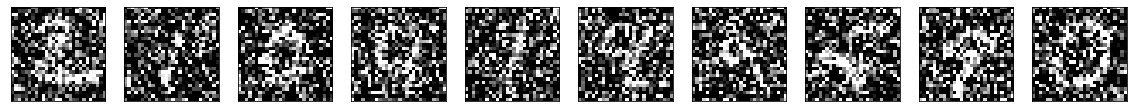

In [4]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
x_train[0].shape

(784,)

In [6]:
encoding_dim = 15

input_img = Input(shape=(x_train[0].shape))
encoded_1 = Dense(200, activation='relu')(input_img)
encoded_2 = Dense(100, activation='relu')(encoded_1)
encoded_3 = Dense(30, activation='relu')(encoded_2)
encoded = Dense(encoding_dim, activation='relu')(encoded_3)
decoded_3 = Dense(30, activation='relu')(encoded)
decoded_2 = Dense(100, activation='relu')(decoded_3) 
decoded_1 = Dense(200, activation='relu')(decoded_2) 
decoded = Dense((x_train[0].shape[0]), activation='sigmoid')(decoded_1)

autoencoder = Model(inputs=input_img, outputs=decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 15)                465       
                                                                 
 dense_4 (Dense)             (None, 30)                480       
                                                                 
 dense_5 (Dense)             (None, 100)               3100  

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 5s 17ms/step - loss: 0.2601 - val_loss: 0.1872
Epoch 2/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1676 - val_loss: 0.1515
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1452 - val_loss: 0.1378
Epoch 4/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1354 - val_loss: 0.1316
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1298 - val_loss: 0.1271
Epoch 6/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1261 - val_loss: 0.1240
Epoch 7/30
235/235 [==============================] - 2s 11ms/step - loss: 0.1235 - val_loss: 0.1218
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1216 - val_loss: 0.1199
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1198 - val_loss: 0.1182
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1181 - val_lo

In [9]:
decoded_img = autoencoder.predict(x_test)

Orignal Image:


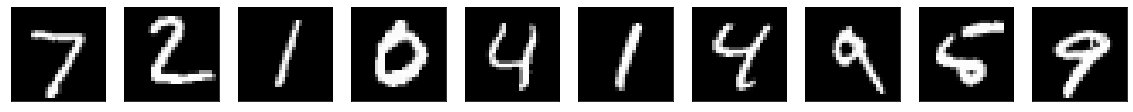

Noisy Image:


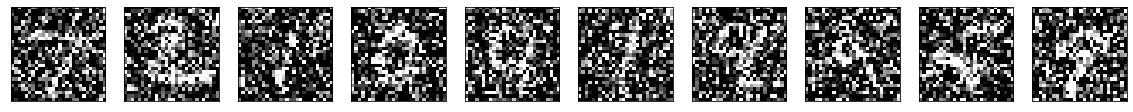

Reconstructed Image:


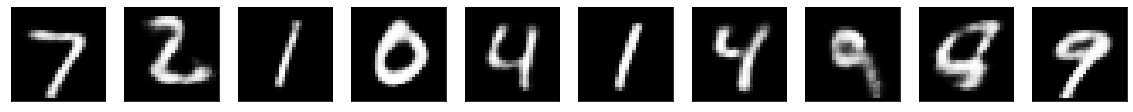

In [10]:
n = 10

print('Orignal Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Noisy Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Reconstructed Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


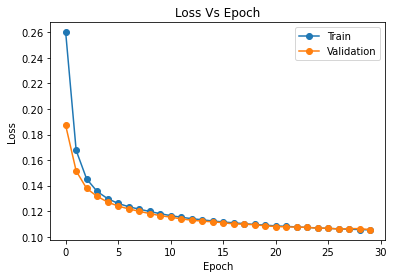

In [12]:
plt.plot(history.history['loss'],'-o')
plt.plot(history.history['val_loss'],'-o')
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()